# JLS Corpus analyses

## Setup

In [ ]:
!pip install nltk mplcursors tqdm langdetect langcodes language_data seaborn
%matplotlib inline

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

In [2]:
import os, pickle
from scripts.utils import create_corpus, DOICache
from dotenv import load_dotenv
load_dotenv()
corpus_dir = os.getenv('CORPUS_BASE_DIR') + '/FULLTEXTS/JLS/jls-txt'
doi_cache = DOICache("data/jls-doi-to-year.csv")
articles_df = create_corpus(corpus_dir, doi_cache)
with open('cache/jls-corpus.pkl', mode='wb') as f:
    pickle.dump(articles_df, f)

Analyzing article corpus:   0%|          | 0/1650 [00:00<?, ?it/s]

Looking up 10.1111/j.1467-6478.2005.310_1.x...
Looking up 10.1111/j.1467-6478.2005.311_1.x...
Looking up 10.1111/j.1467-6478.2005.312_1.x...
Looking up 10.1111/j.1467-6478.2005.313_1.x...
Looking up 10.1111/j.1467-6478.2005.314_1.x...
Looking up 10.1111/j.1467-6478.2005.315_1.x...
Looking up 10.1111/j.1467-6478.2005.316_1.x...
Looking up 10.1111/j.1467-6478.2005.317_1.x...
Looking up 10.1111/j.1467-6478.2005.318_1.x...
Looking up 10.1111/j.1467-6478.2005.319_1.x...
Looking up 10.1111/j.1467-6478.2005.320_1.x...
Looking up 10.1111/j.1467-6478.2005.321_1.x...
Looking up 10.1111/j.1467-6478.2007.00408_1.x...
Looking up 10.1111/j.1467-6478.2007.00408_2.x...
Looking up 10.1111/j.1467-6478.2007.00408_3.x...
Looking up 10.1111/j.1467-6478.2008.00445_1.x...
Looking up 10.1111/j.1467-6478.2008.00445_2.x...
Looking up 10.1111/j.1467-6478.2008.00450_1.x...
Looking up 10.1111/j.1467-6478.2008.00450_2.x...
Looking up 10.1111/j.1467-6478.2008.00450_3.x...
Looking up 10.1111/j.1467-6478.2008.00450_4.

In [3]:
articles_df


,doi,text,year,title,author
1141,10.2307/1409866,SOME JOBS FOR JURISPRUDEN...,1974.0,Some Jobs for Jurisprudence,Twining
1147,10.2307/1409872,Book Reviews...,1974.0,The Legal Structure,Sumner
1146,10.2307/1409871,effortsto drawto the attentionof those respons...,1974.0,Co-Operation between Lawyers and Sociologists:...,Treves
1145,10.2307/1409870,HOMELESSNESS: CAN THE COURTS CONTRIBUTE...,1974.0,Homelessness: Can the Courts Contribute?,James
1144,10.2307/1409869,SOCIAL ACTION AND A METHODOLOGY FOR TH...,1974.0,Social Action and a Methodology for the Sociol...,Grace
...,...,...,...,...,...
920,10.1111/jols.12302.x,Socio-Legal\nNEWSLETTER ...,NaN,None,
921,10.1111/jols.12303.x,Socio-Legal\nNEWSLETTER ...,NaN,None,
933,10.1111/jols.12315.x,Socio-Legal\nNEWSLETTER ...,NaN,None,
934,10.1111/jols.12316.x,Socio-Legal\nNEWSLETTER ...,NaN,None,


Once the corpus has been cached in a pickle file, you can pick up here without having to regenerate it.

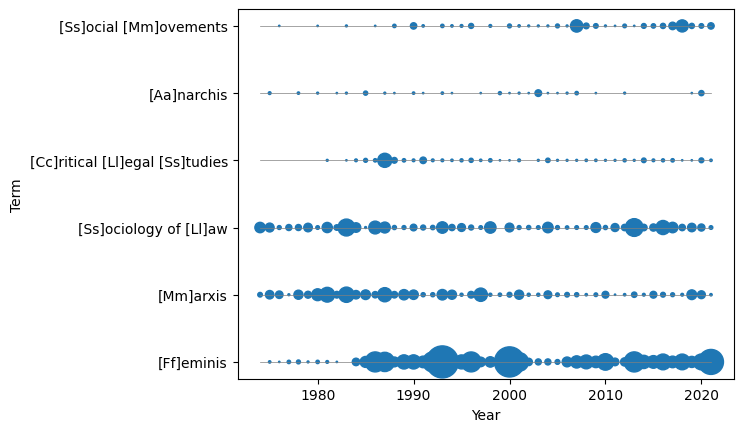

In [5]:
import pickle
with open('cache/jls-corpus.pkl', mode='rb') as f:
    articles_df = pickle.load(f)
from scripts.occurrence_by_year_scatter import prepare_data, plot_by_year
data = prepare_data(articles_df, [r'[Ff]eminis',r'[Mm]arxis', r'[Ss]ociology of [Ll]aw',r'[Cc]ritical [Ll]egal [Ss]tudies', r'[Aa]narchis',r'[Ss]ocial [Mm]ovements'])
plot_by_year(data)


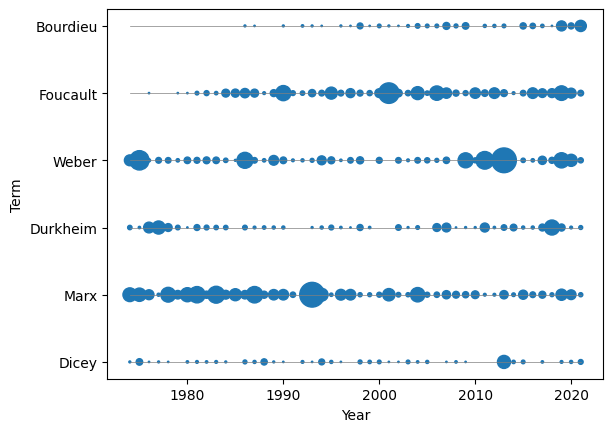

In [6]:
data = prepare_data(articles_df, [r'Dicey',r'Marx', r'Durkheim',r'Weber', r'Foucault',r'Bourdieu'])
plot_by_year(data)

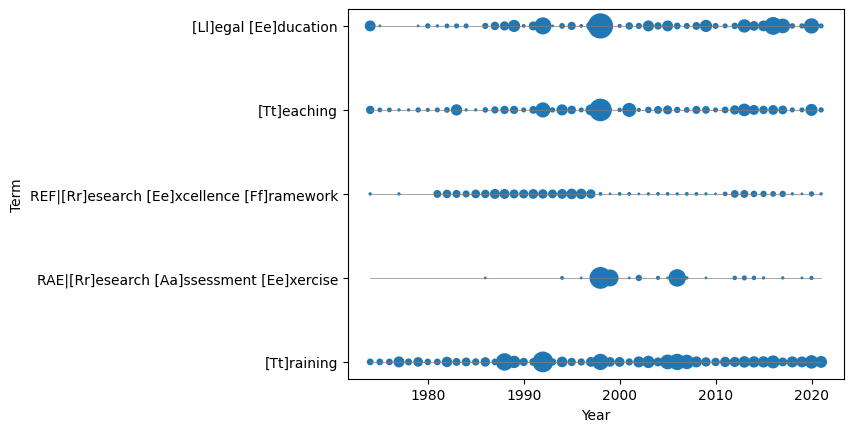

In [7]:
data = prepare_data(articles_df, [r'[Tt]raining',r'RAE|[Rr]esearch [Aa]ssessment [Ee]xercise',r'REF|[Rr]esearch [Ee]xcellence [Ff]ramework', r'[Tt]eaching',r'[Ll]egal [Ee]ducation'])
plot_by_year(data)

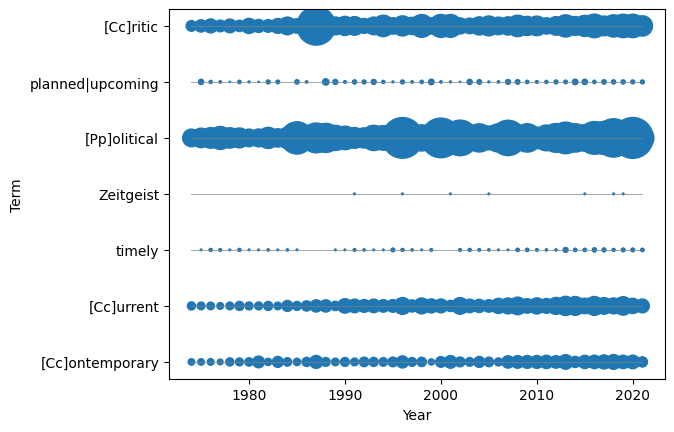

In [11]:
data = prepare_data(articles_df, [r'[Cc]ontemporary' , r'[Cc]urrent' , r'timely', r'Zeitgeist', r'[Pp]olitical',  r'timely' , r'Zeitgeist' , r'planned|upcoming', r'[Cc]ritic'])
plot_by_year(data)

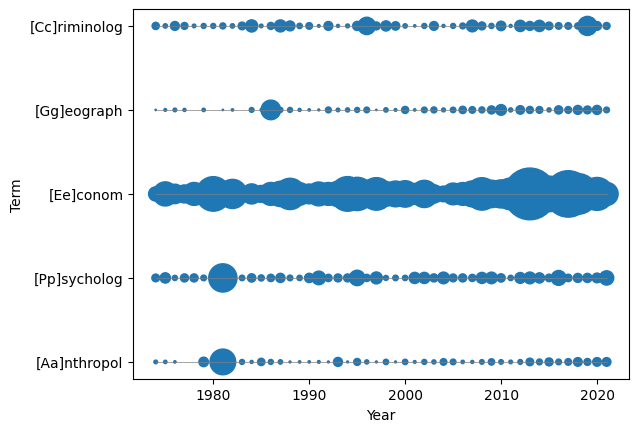

In [16]:
data = prepare_data(articles_df, [r'[Aa]nthropol' , r'[Pp]sycholog' , r'[Ee]conom', r'[Gg]eograph',  r'[Cc]riminolog'])
plot_by_year(data)

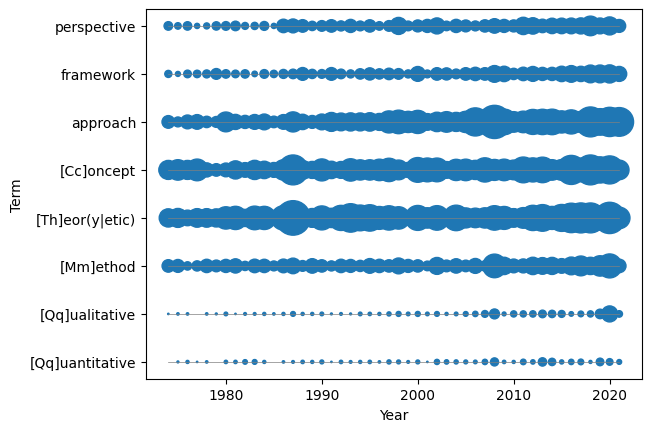

In [24]:
data = prepare_data(articles_df, [r'[Qq]uantitative' , r'[Qq]ualitative' , r'[Mm]ethod', r'[Th]eor(y|etic)', r'[Cc]oncept', r'approach', r'framework', r'perspective'])
plot_by_year(data)

### Methods section